### Loading the Datasets & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



import re

In [2]:
df = pd.read_csv("../../data/raw/Roommate_Compatibility_Survey.csv")


### Initial Observations or Trends :

In [3]:
df.head()

,Timestamp,Name (optional),Gender,Age,Faculty (الكلية),Religion (الديانة),Are your parents Abroad? (هل والديكم في الخارج؟),Do you live with your parents? (هل تعيش مع والديك؟),Do you smoke? (هل تدخن؟),Do you mind if your roommate smokes? (هل تمانع إذا كان زميلك في السكن يدخن؟),...,I go to bed: (أنام:),I get up: (أستيقظ:),I expect to study: \n(أتوقع أن أذاكر:),I plan to study:\n(أخطط للدراسة:),When I study: \n(عندما أدرس:),I require: \n(أحتاج:),What concerns do you have about your future roommate? \n(ما هي المخاوف التي لديك حول زميل السكن المستقبلي؟),How often do you prefer your roommate to have guests over? \n(كم مرة تفضل أن يستضيف زميل السكن الضيوف؟),"When dealing with conflicts, how do you usually handle them? \n(عند التعامل مع الصراعات، كيف عادة ما تتعامل معها؟)",How do you prefer to communicate with your roommate about important matters? (كيف تفضل التواصل مع زميلك في السكن بشأن المسائل الهامة؟)
0,2024/04/25 11:59:16 pm GMT+3,Youssef hatem abd elmasen,Male,21,Computer Science & Engineering (علوم الحاسوب و...,Islam (الإسلام),No (لا),Yes (نعم),No (لا),Yes (نعم),...,Around Midnight (حوالي منتصف الليل),As late as possible (في أقرب وقت ممكن),In my room (في غرفتي),In the evening (في المساء),I don’t have a preference (ليس لدي تفضيل),Some private time (بعض الوقت الخاص),Messy (فوضوي),Rarely (نادرًا),I hint at what bothers me in a joking manner. ...,Face-to-face (وجهًا لوجه)
1,2024/04/25 11:59:28 pm GMT+3,Basmlaa,Female,19,Computer Science & Engineering (علوم الحاسوب و...,Islam (الإسلام),Yes (نعم),No (لا),No (لا),Yes (نعم),...,After Midnight (بعد منتصف الليل),Somewhat Early (باكرًا إلى حد ما),In my room (في غرفتي),In the afternoon (بعد الظهر),I don’t have a preference (ليس لدي تفضيل),A significant amount of private time (كمية كبي...,Not picking up after themselves (عدم التنظيف ب...,Frequently (بشكل متكرر),I am not comfortable addressing a conflict. (ل...,Face-to-face (وجهًا لوجه)
2,2024/04/25 11:59:49 pm GMT+3,Eman elshahat,Female,21,Computer Science & Engineering (علوم الحاسوب و...,Islam (الإسلام),No (لا),Yes (نعم),No (لا),Maybe (ربما),...,After Midnight (بعد منتصف الليل),Somewhat Early (باكرًا إلى حد ما),In my room (في غرفتي),In the evening (في المساء),I need total quiet (أحتاج لهدوء تام),A significant amount of private time (كمية كبي...,Obnoxious behavior (سلوك مزعج);Loud music/TV (...,Often (غالبًا),I am not comfortable addressing a conflict. (ل...,Face-to-face (وجهًا لوجه)
3,2024/04/26 12:00:01 am GMT+3,روان اسامه طبنجات,Female,20,Computer Science & Engineering (علوم الحاسوب و...,Islam (الإسلام),No (لا),Yes (نعم),No (لا),Yes (نعم),...,After Midnight (بعد منتصف الليل),Very Early (باكرًا جدًا),In my room (في غرفتي),Late at night (في وقت متأخر من الليل),I like to have music or other background noise...,Very little private time (وقتًا خاصًا قليلًا ج...,Obnoxious behavior (سلوك مزعج);Not picking up ...,Sometimes (أحيانًا),I am not comfortable addressing a conflict. (ل...,Face-to-face (وجهًا لوجه)
4,2024/04/26 12:00:01 am GMT+3,Mai,Female,19,Computer Science & Engineering (علوم الحاسوب و...,Islam (الإسلام),No (لا),Yes (نعم),No (لا),No (لا),...,After Midnight (بعد منتصف الليل),Late (متأخرًا),Both inside and outside my room (كلاهما داخل و...,Late at night (في وقت متأخر من الليل),I don’t have a preference (ليس لدي تفضيل),Some private time (بعض الوقت الخاص),Obnoxious behavior (سلوك مزعج);Not picking up ...,Rarely (نادرًا),I hint at what bothers me in a joking manner. ...,Face-to-face (وجهًا لوجه)


In [4]:
df.drop(columns=['Timestamp','Name (optional) '],inplace=True)

In [5]:
# Regex funciton to remove arabic text
def remove_arabic(text, is_header=False):
    if is_header:
        return re.sub(r'\([^)]*\)', '', text).strip()
    else:
        return re.sub(r'\([^)]*\)', '', text).strip()


# function to remove Arabic text from both cells and column headers using regex function
def remove_arabic_dataframe(df):
    cleaned_df = df.map(remove_arabic)
    
    # Clean column headers
    cleaned_columns = [remove_arabic(column, is_header=True) for column in df.columns]
    cleaned_df.columns = cleaned_columns
    
    return cleaned_df

In [6]:
df = remove_arabic_dataframe(df)

In [7]:
df.head()

,Gender,Age,Faculty,Religion,Are your parents Abroad?,Do you live with your parents?,Do you smoke?,Do you mind if your roommate smokes?,What kind of relationship are you looking for in a roommate?,What accurately describes your ideal study environment?,...,I go to bed:,I get up:,I expect to study:,I plan to study:,When I study:,I require:,What concerns do you have about your future roommate?,How often do you prefer your roommate to have guests over?,"When dealing with conflicts, how do you usually handle them?",How do you prefer to communicate with your roommate about important matters?
0,Male,21,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,Around Midnight,As late as possible,In my room,In the evening,I don’t have a preference,Some private time,Messy,Rarely,I hint at what bothers me in a joking manner.,Face-to-face
1,Female,19,Computer Science & Engineering,Islam,Yes,No,No,Yes,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,After Midnight,Somewhat Early,In my room,In the afternoon,I don’t have a preference,A significant amount of private time,Not picking up after themselves ;Lack of respe...,Frequently,I am not comfortable addressing a conflict.,Face-to-face
2,Female,21,Computer Science & Engineering,Islam,No,Yes,No,Maybe,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,After Midnight,Somewhat Early,In my room,In the evening,I need total quiet,A significant amount of private time,Obnoxious behavior ;Loud music/TV ;Not picking...,Often,I am not comfortable addressing a conflict.,Face-to-face
3,Female,20,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,After Midnight,Very Early,In my room,Late at night,I like to have music or other background noise,Very little private time,Obnoxious behavior ;Not picking up after thems...,Sometimes,I am not comfortable addressing a conflict.,Face-to-face
4,Female,19,Computer Science & Engineering,Islam,No,Yes,No,No,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,After Midnight,Late,Both inside and outside my room,Late at night,I don’t have a preference,Some private time,Obnoxious behavior ;Not picking up after thems...,Rarely,I hint at what bothers me in a joking manner.,Face-to-face


In [8]:
# Checking the number of rows and columns

num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Number of Rows: 256
Number of Columns: 23



In [9]:
# Creating a table for missing values, unique values and data types of the features

missing_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Missing Values': df.isnull().sum().values,
                              '% of Missing Values': ((df.isnull().sum().values)/len(df)*100)})

unique_values = pd.DataFrame({'Feature': df.columns,
                              'No. of Unique Values': df.nunique().values})

feature_types = pd.DataFrame({'Feature': df.columns,
                              'DataType': df.dtypes})

merged_df = pd.merge(missing_values, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

,Feature,No. of Missing Values,% of Missing Values,No. of Unique Values,DataType
0,Gender,0,0.0,2,object
1,Age,0,0.0,8,object
2,Faculty,0,0.0,10,object
3,Religion,0,0.0,2,object
4,Are your parents Abroad?,0,0.0,2,object
5,Do you live with your parents?,0,0.0,2,object
6,Do you smoke?,0,0.0,3,object
7,Do you mind if your roommate smokes?,0,0.0,3,object
8,What kind of relationship are you looking for ...,0,0.0,2,object
9,What accurately describes your ideal study env...,0,0.0,3,object


In [10]:
df.describe().T

,count,unique,top,freq
Gender,256,2,Female,141
Age,256,8,19,85
Faculty,256,10,Computer Science & Engineering,92
Religion,256,2,Islam,251
Are your parents Abroad?,256,2,No,157
Do you live with your parents?,256,2,Yes,182
Do you smoke?,256,3,No,244
Do you mind if your roommate smokes?,256,3,Yes,169
What kind of relationship are you looking for in a roommate?,256,2,I am looking for a roommate who I can peaceful...,183
What accurately describes your ideal study environment?,256,3,I need to study in a very quiet environment.,194


In [11]:
# Count duplicate rows in train_data
duplicates = df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 0


In [12]:
df.rename(columns={
    'Gender': 'Gender',
    'Age': 'Age',
    'Faculty': 'Faculty',
    'Religion': 'Religion',
    'Are your parents Abroad?': 'Parents_Abroad',
    'Do you live with your parents?': 'Living_with_Parents',
    'Do you smoke?': 'Do_you_smoke',
    'Do you mind if your roommate smokes?': 'Attitude_towards_Roommate_Smoking',
    'What kind of relationship are you looking for in a roommate?': 'Preferred_Roommate_Relationship_Type',
    'What accurately describes your ideal study environment?': 'Ideal_Study_Environment_Description',
    'How do you feel about borrowing/sharing items?': 'Attitude_towards_Borrowing_Sharing',
    'I would describe my room at home as:': 'Description_of_Personal_Room_At_Home',
    'I want my room to be:': 'Desired_Room_Attributes',
    'I go to bed:': 'Bedtime_Preference',
    'I get up:': 'Wake_Up_Time_Preference',
    'I expect to study:': 'Expected_Study_Time_Preference',
    'I plan to study:': 'Planned_Study_Time_Preference',
    'When I study:': 'Study_Time_Preference',
    'I require:': 'Private_Time_Requirements',
    'What concerns do you have about your future roommate?': 'Concerns_about_Future_Roommate',
    'How often do you prefer your roommate to have guests over?': 'Guest_Frequency_Preference',
    'When dealing with conflicts, how do you usually handle them?': 'Conflict_Handling_Method',
    'How do you prefer to communicate with your roommate about important matters?': 'Communication_Preference_with_Roommate'

}, inplace=True)

In [13]:
df.head()

,Gender,Age,Faculty,Religion,Parents_Abroad,Living_with_Parents,Do_you_smoke,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,...,Bedtime_Preference,Wake_Up_Time_Preference,Expected_Study_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Concerns_about_Future_Roommate,Guest_Frequency_Preference,Conflict_Handling_Method,Communication_Preference_with_Roommate
0,Male,21,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,Around Midnight,As late as possible,In my room,In the evening,I don’t have a preference,Some private time,Messy,Rarely,I hint at what bothers me in a joking manner.,Face-to-face
1,Female,19,Computer Science & Engineering,Islam,Yes,No,No,Yes,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,After Midnight,Somewhat Early,In my room,In the afternoon,I don’t have a preference,A significant amount of private time,Not picking up after themselves ;Lack of respe...,Frequently,I am not comfortable addressing a conflict.,Face-to-face
2,Female,21,Computer Science & Engineering,Islam,No,Yes,No,Maybe,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,After Midnight,Somewhat Early,In my room,In the evening,I need total quiet,A significant amount of private time,Obnoxious behavior ;Loud music/TV ;Not picking...,Often,I am not comfortable addressing a conflict.,Face-to-face
3,Female,20,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,After Midnight,Very Early,In my room,Late at night,I like to have music or other background noise,Very little private time,Obnoxious behavior ;Not picking up after thems...,Sometimes,I am not comfortable addressing a conflict.,Face-to-face
4,Female,19,Computer Science & Engineering,Islam,No,Yes,No,No,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,After Midnight,Late,Both inside and outside my room,Late at night,I don’t have a preference,Some private time,Obnoxious behavior ;Not picking up after thems...,Rarely,I hint at what bothers me in a joking manner.,Face-to-face


In [14]:
# Checking the number of rows and columns

num_rows, num_columns = df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")

Number of Rows: 256
Number of Columns: 23



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Gender                                  256 non-null    object
 1   Age                                     256 non-null    object
 2   Faculty                                 256 non-null    object
 3   Religion                                256 non-null    object
 4   Parents_Abroad                          256 non-null    object
 5   Living_with_Parents                     256 non-null    object
 6   Do_you_smoke                            256 non-null    object
 7   Attitude_towards_Roommate_Smoking       256 non-null    object
 8   Preferred_Roommate_Relationship_Type    256 non-null    object
 9   Ideal_Study_Environment_Description     256 non-null    object
 10  Attitude_towards_Borrowing_Sharing      256 non-null    object
 11  Descri

In [16]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: Gender
['Male' 'Female']

Column: Age
['21' '19' '20' '22' '18' '23' '17' '> 23']

Column: Faculty
['Computer Science & Engineering' 'Medicine' 'Textile Science Engineering'
 'Business' 'Science' 'Engineering' 'Dentistry' 'Pharmacy'
 'Nursing Sciences' 'Applied Health Sciences Technology']

Column: Religion
['Islam' 'Christianity']

Column: Parents_Abroad
['No' 'Yes']

Column: Living_with_Parents
['Yes' 'No']

Column: Do_you_smoke
['No' 'Yes' 'Sometimes']

Column: Attitude_towards_Roommate_Smoking
['Yes' 'Maybe' 'No']

Column: Preferred_Roommate_Relationship_Type
['I am looking for a roommate who I can peacefully coexist with.'
 'I am looking for a roommate to do everything with']

Column: Ideal_Study_Environment_Description
['I need to study in a very quiet environment.'
 'My ideal study environment has some background noise.'
 'High noise levels do not disturb me while studying.']

Column: Attitude_towards_Borrowing_Sharing
['I am fine with sharing items, but my roommate has 

##### Age (convert it to categorical) 

In [17]:
age_counts = df['Age'].value_counts()
print("Count of each unique value in the 'Age' column:")
print(age_counts)

Count of each unique value in the 'Age' column:
Age
19      85
20      71
18      43
21      37
> 23    10
22       5
23       3
17       2
Name: count, dtype: int64


In [18]:
df['Age'] = df['Age'].replace(['> 23', '23'], '23')

In [19]:
age_counts = df['Age'].value_counts()
print("Count of each unique value in the 'Age' column:")
print(age_counts)

Count of each unique value in the 'Age' column:
Age
19    85
20    71
18    43
21    37
23    13
22     5
17     2
Name: count, dtype: int64


#### feauture with multiple answers (Concerns_about_Future_Roommate) 

In [20]:
concerns_list = [
    'Obnoxious behavior',
    'Loud music/TV',
    'Being loud when I’m studying/sleeping',
    'Eating my food',
    'Not picking up after themselves',
    'Being unfriendly',
    'Lack of respect for me and my privacy',
    'Not being open-minded',
    'Bad personal hygiene',
    'Using my things without asking',
    'Having guests over too much',
    'Messy'
]


# Create a new column for each concern and encode as yes if concern is present, no otherwise
for concern in concerns_list:
    df[concern] = df['Concerns_about_Future_Roommate'].apply(lambda x: "yes" if concern in x else "no")
df.drop(columns=['Concerns_about_Future_Roommate'], inplace=True)

# Rename columns with a prefix
prefix = 'Concern_'
df.rename(columns={col: prefix + col for col in concerns_list}, inplace=True)


df.head()

,Gender,Age,Faculty,Religion,Parents_Abroad,Living_with_Parents,Do_you_smoke,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,...,Concern_Being loud when I’m studying/sleeping,Concern_Eating my food,Concern_Not picking up after themselves,Concern_Being unfriendly,Concern_Lack of respect for me and my privacy,Concern_Not being open-minded,Concern_Bad personal hygiene,Concern_Using my things without asking,Concern_Having guests over too much,Concern_Messy
0,Male,21,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,no,no,no,no,no,no,no,no,no,yes
1,Female,19,Computer Science & Engineering,Islam,Yes,No,No,Yes,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,no,no,yes,no,yes,no,yes,yes,no,no
2,Female,21,Computer Science & Engineering,Islam,No,Yes,No,Maybe,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,no,no,yes,no,yes,no,no,no,no,no
3,Female,20,Computer Science & Engineering,Islam,No,Yes,No,Yes,I am looking for a roommate who I can peaceful...,I need to study in a very quiet environment.,...,no,no,yes,yes,yes,no,no,no,no,no
4,Female,19,Computer Science & Engineering,Islam,No,Yes,No,No,I am looking for a roommate to do everything with,I need to study in a very quiet environment.,...,no,no,yes,no,yes,no,no,no,no,yes


In [21]:
from sklearn.preprocessing import OrdinalEncoder
# Define the order for each ordinal column
ordering = {
    'Ideal_Study_Environment_Description': [
        'I need to study in a very quiet environment.',
        'My ideal study environment has some background noise.',
        'High noise levels do not disturb me while studying.'
    ],
    'Description_of_Personal_Room_At_Home': [
        'Disaster Area', 'Cluttered', 'Fairly neat and clean', 'Always clean and organized'
    ],
    'Bedtime_Preference': ['Before midnight', 'Around Midnight', 'Usually right at', 'After Midnight'],
    'Wake_Up_Time_Preference': ['Very Early', 'Somewhat Early', 'Usually right at', 'Late', 'As late as possible'],
    'Planned_Study_Time_Preference': ['In the morning', 'In the afternoon', 'In the evening', 'Late at night'],
    'Private_Time_Requirements': ['Very little private time', 'Some private time', 'A significant amount of private time'],
    'Guest_Frequency_Preference': ['Never', 'Rarely', 'Sometimes', 'Often', 'Frequently']
}

# Apply the OrdinalEncoder
encoder = OrdinalEncoder(categories=[ordering[col] for col in ordering])
encoded_df = pd.DataFrame()
encoded_df[list(ordering.keys())] = encoder.fit_transform(df[list(ordering.keys())])


In [22]:
encoded_df.head()

,Ideal_Study_Environment_Description,Description_of_Personal_Room_At_Home,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference
0,0.0,3.0,1.0,4.0,2.0,1.0,1.0
1,0.0,3.0,3.0,1.0,1.0,2.0,4.0
2,0.0,2.0,3.0,1.0,2.0,2.0,3.0
3,0.0,3.0,3.0,0.0,3.0,0.0,2.0
4,0.0,2.0,3.0,3.0,3.0,1.0,1.0


#### ordinal feautures encoding

In [23]:
# Get the columns that are not in ordering.keys()
nominal = [col for col in df.columns if col not in ordering.keys()]

nominal


['Gender',
 'Age',
 'Faculty',
 'Religion',
 'Parents_Abroad',
 'Living_with_Parents',
 'Do_you_smoke',
 'Attitude_towards_Roommate_Smoking',
 'Preferred_Roommate_Relationship_Type',
 'Attitude_towards_Borrowing_Sharing',
 'Desired_Room_Attributes',
 'Expected_Study_Time_Preference',
 'Study_Time_Preference',
 'Conflict_Handling_Method',
 'Communication_Preference_with_Roommate',
 'Concern_Obnoxious behavior',
 'Concern_Loud music/TV',
 'Concern_Being loud when I’m studying/sleeping',
 'Concern_Eating my food',
 'Concern_Not picking up after themselves',
 'Concern_Being unfriendly',
 'Concern_Lack of respect for me and my privacy',
 'Concern_Not being open-minded',
 'Concern_Bad personal hygiene',
 'Concern_Using my things without asking',
 'Concern_Having guests over too much',
 'Concern_Messy']

In [24]:
for column in nominal:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: Gender
['Male' 'Female']

Column: Age
['21' '19' '20' '22' '18' '23' '17']

Column: Faculty
['Computer Science & Engineering' 'Medicine' 'Textile Science Engineering'
 'Business' 'Science' 'Engineering' 'Dentistry' 'Pharmacy'
 'Nursing Sciences' 'Applied Health Sciences Technology']

Column: Religion
['Islam' 'Christianity']

Column: Parents_Abroad
['No' 'Yes']

Column: Living_with_Parents
['Yes' 'No']

Column: Do_you_smoke
['No' 'Yes' 'Sometimes']

Column: Attitude_towards_Roommate_Smoking
['Yes' 'Maybe' 'No']

Column: Preferred_Roommate_Relationship_Type
['I am looking for a roommate who I can peacefully coexist with.'
 'I am looking for a roommate to do everything with']

Column: Attitude_towards_Borrowing_Sharing
['I am fine with sharing items, but my roommate has to ask before using something that is mine.'
 'I do not like sharing items and would prefer if my roommate used her/his own items only.'
 'I am fine with sharing items and my roommate can just use it without askin

Gender
Female    141
Male      115
Name: count, dtype: int64
Faculty
Computer Science & Engineering        92
Medicine                              61
Dentistry                             35
Pharmacy                              21
Science                               18
Engineering                           14
Business                               7
Nursing Sciences                       5
Applied Health Sciences Technology     2
Textile Science Engineering            1
Name: count, dtype: int64
Religion
Islam           251
Christianity      5
Name: count, dtype: int64
Parents_Abroad
No     157
Yes     99
Name: count, dtype: int64
Living_with_Parents
Yes    182
No      74
Name: count, dtype: int64
Do_you_smoke
No           244
Yes            7
Sometimes      5
Name: count, dtype: int64
Attitude_towards_Roommate_Smoking
Yes      169
No        54
Maybe     33
Name: count, dtype: int64
Preferred_Roommate_Relationship_Type
I am looking for a roommate who I can peacefully coexist with. 

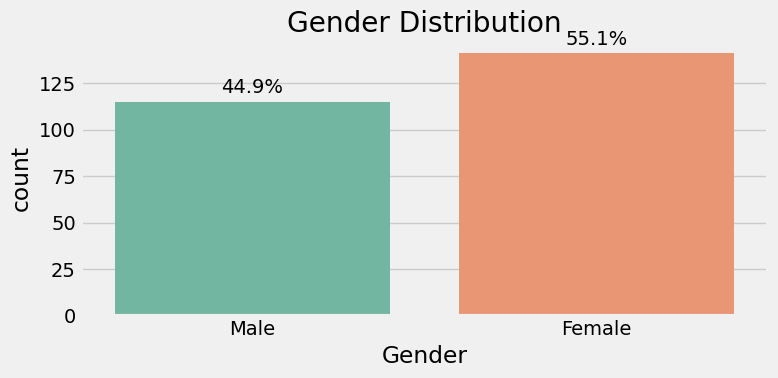

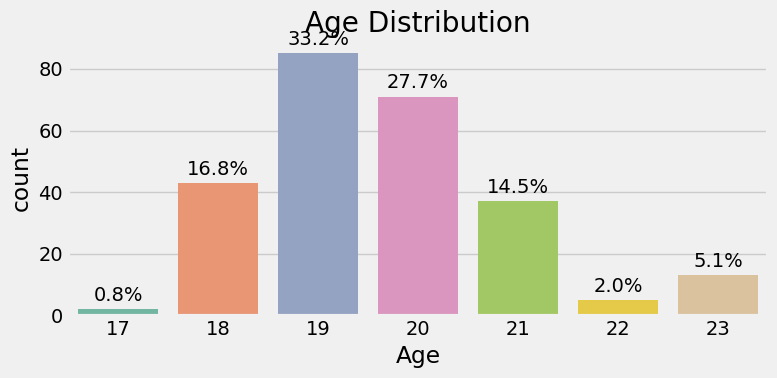

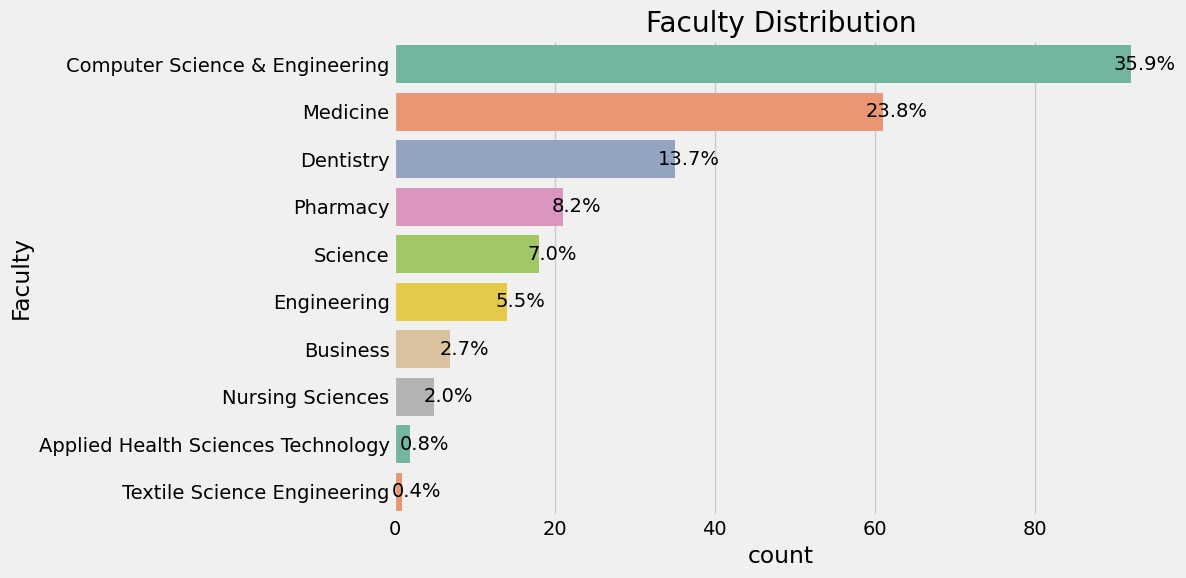

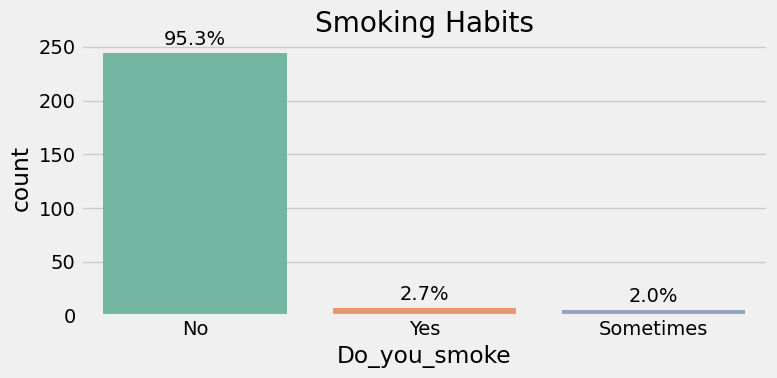

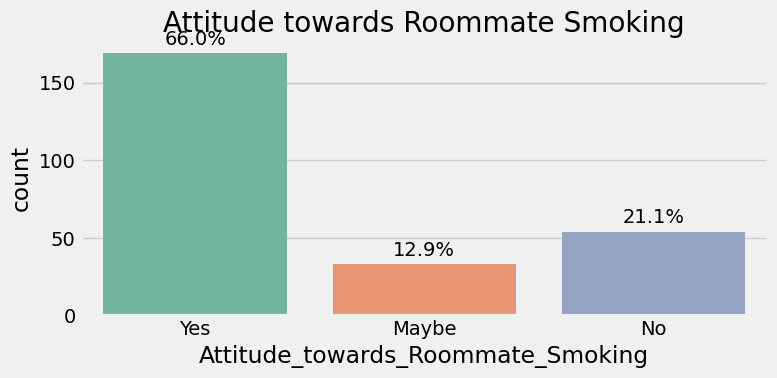

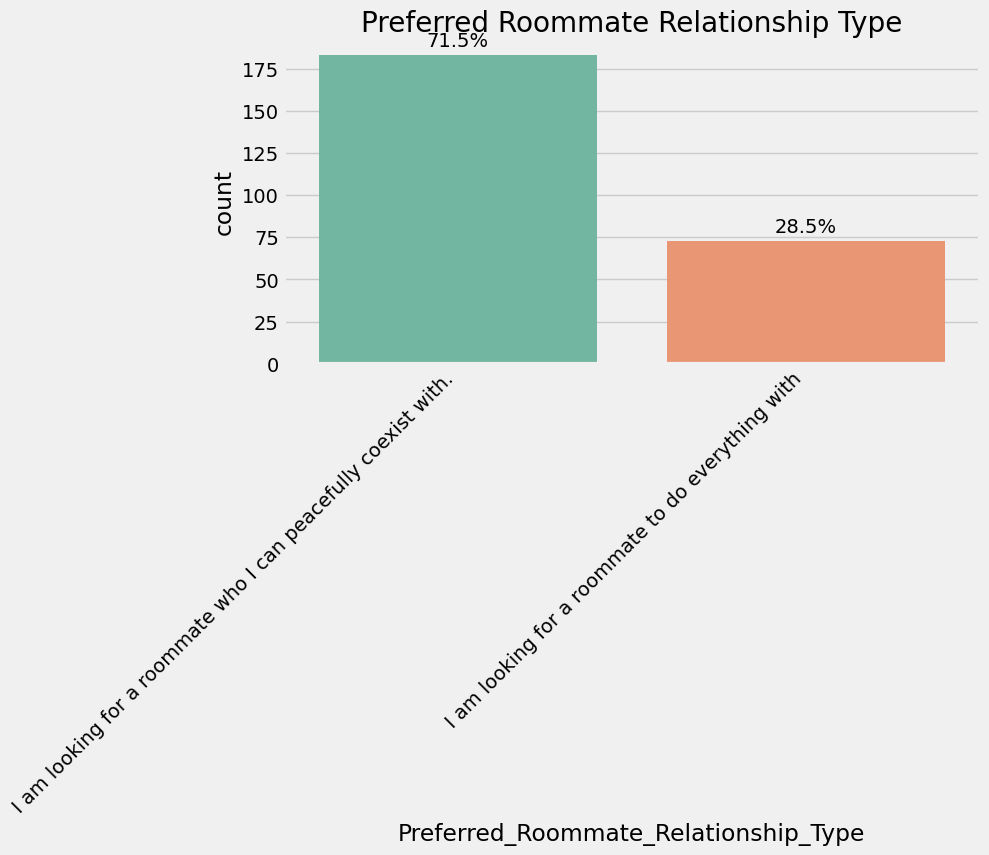

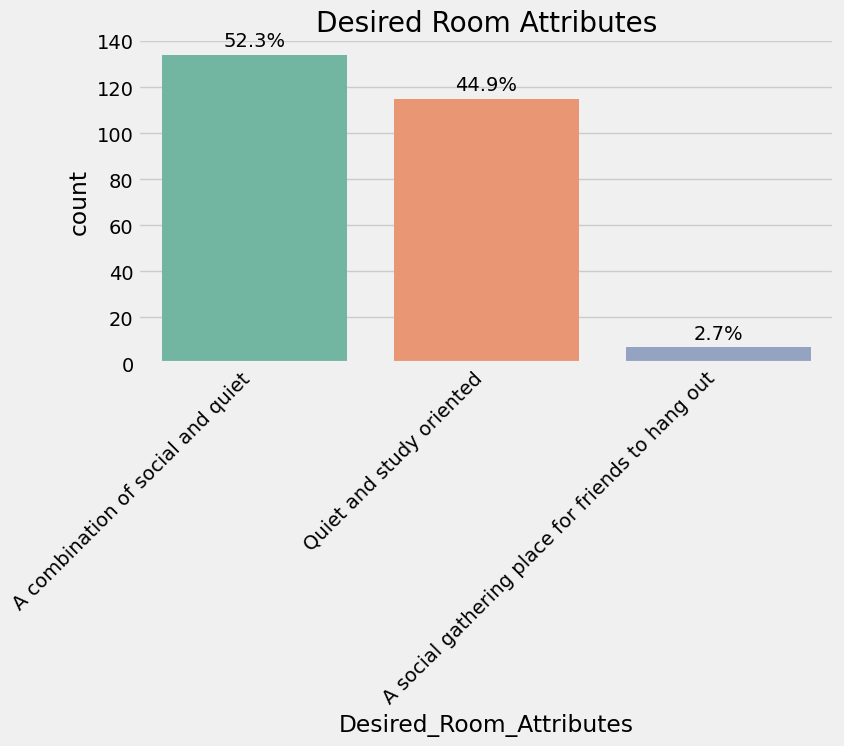

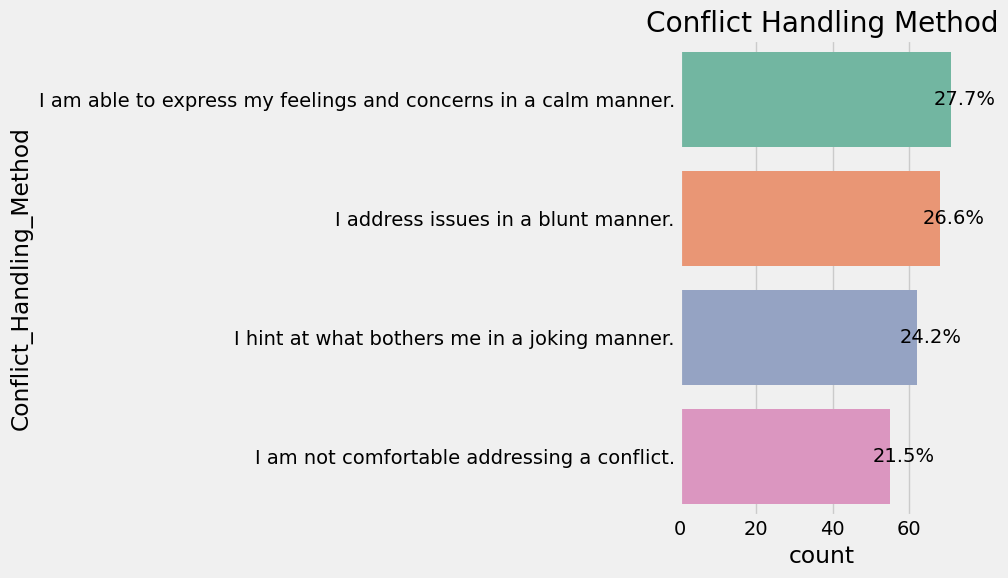

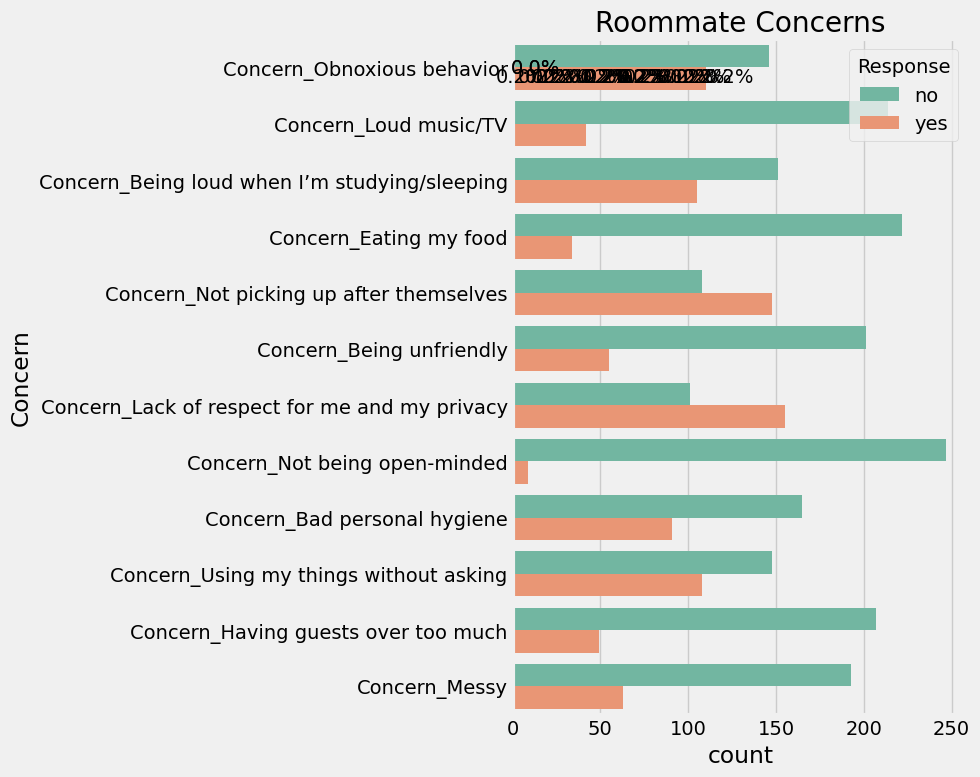

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded as a DataFrame

# Ensure Age column is ordered correctly
data['Age'] = pd.Categorical(data['Age'], categories=sorted(data['Age'].unique()), ordered=True)

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Function to annotate bars with percentage
def annotate_percentage(ax):
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Frequency counts for categorical columns
categorical_columns = ['Gender', 'Faculty', 'Religion', 'Parents_Abroad', 'Living_with_Parents', 
                       'Do_you_smoke', 'Attitude_towards_Roommate_Smoking', 'Preferred_Roommate_Relationship_Type', 
                       'Attitude_towards_Borrowing_Sharing', 'Desired_Room_Attributes', 'Expected_Study_Time_Preference', 
                       'Study_Time_Preference', 'Conflict_Handling_Method', 'Communication_Preference_with_Roommate', 
                       'Concern_Obnoxious behavior', 'Concern_Loud music/TV', 'Concern_Being loud when I’m studying/sleeping', 
                       'Concern_Eating my food', 'Concern_Not picking up after themselves', 'Concern_Being unfriendly', 
                       'Concern_Lack of respect for me and my privacy', 'Concern_Not being open-minded', 'Concern_Bad personal hygiene', 
                       'Concern_Using my things without asking', 'Concern_Having guests over too much', 'Concern_Messy']

for column in categorical_columns:
    print(data[column].value_counts())

# Visualizations

# Gender Distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Gender', data=data, palette=custom_palette)
plt.title('Gender Distribution')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Age Distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Age', data=data, order=sorted(data['Age'].unique()), palette=custom_palette)
plt.title('Age Distribution')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Faculty Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Faculty', data=data, order=data['Faculty'].value_counts().index, palette=custom_palette)
plt.title('Faculty Distribution')
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

# Smoking Habits
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Do_you_smoke', data=data, palette=custom_palette)
plt.title('Smoking Habits')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Attitude towards Roommate Smoking
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Attitude_towards_Roommate_Smoking', data=data, palette=custom_palette)
plt.title('Attitude towards Roommate Smoking')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Preferred Roommate Relationship Type
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Preferred_Roommate_Relationship_Type', data=data, palette=custom_palette)
plt.title('Preferred Roommate Relationship Type')
plt.xticks(rotation=45, ha='right')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Desired Room Attributes
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Desired_Room_Attributes', data=data, palette=custom_palette)
plt.title('Desired Room Attributes')
plt.xticks(rotation=45, ha='right')
annotate_percentage(ax)
plt.tight_layout()
plt.show()

# Conflict Handling Method
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Conflict_Handling_Method', data=data, order=data['Conflict_Handling_Method'].value_counts().index, palette=custom_palette)
plt.title('Conflict Handling Method')
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

# Concerns
concern_columns = [col for col in data.columns if col.startswith('Concern')]
concern_data = data[concern_columns].melt(var_name='Concern', value_name='Response')

plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Concern', hue='Response', data=concern_data, order=concern_data['Concern'].unique(), palette=custom_palette)
plt.title('Roommate Concerns')
plt.legend(title='Response', loc='upper right')
total = len(data)
for p in ax.patches:
    height = p.get_height() if p.get_height() > 0 else p.get_width()
    percentage = f'{100 * height / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 if p.get_height() > 0 else p.get_width() + 5
    y = p.get_height() if p.get_height() > 0 else p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 10) if p.get_height() > 0 else (10, 0), textcoords='offset points')
plt.tight_layout()
plt.show()


In [69]:
def classify_variables(df):
    binary_vars = []
    categorical_vars = []
    
    for column_name in df.columns:
        unique_values = df[column_name].unique()
        
        if len(unique_values) <= 2:
            # Treat as binary variable
            binary_vars.append(column_name)
        else:
            # Treat as categorical variable
            categorical_vars.append(column_name)
    
    return binary_vars, categorical_vars

In [70]:
# Classify variables
binary_vars, categorical_vars = classify_variables(df)

print("Binary Variables List:", binary_vars)
print("Categorical Variables List:", categorical_vars)

Binary Variables List: ['Gender', 'Religion', 'Parents_Abroad', 'Living_with_Parents', 'Preferred_Roommate_Relationship_Type', 'Concern_Obnoxious behavior', 'Concern_Loud music/TV', 'Concern_Being loud when I’m studying/sleeping', 'Concern_Eating my food', 'Concern_Not picking up after themselves', 'Concern_Being unfriendly', 'Concern_Lack of respect for me and my privacy', 'Concern_Not being open-minded', 'Concern_Bad personal hygiene', 'Concern_Using my things without asking', 'Concern_Having guests over too much', 'Concern_Messy']
Categorical Variables List: ['Age', 'Faculty', 'Do_you_smoke', 'Attitude_towards_Roommate_Smoking', 'Ideal_Study_Environment_Description', 'Attitude_towards_Borrowing_Sharing', 'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes', 'Bedtime_Preference', 'Wake_Up_Time_Preference', 'Expected_Study_Time_Preference', 'Planned_Study_Time_Preference', 'Study_Time_Preference', 'Private_Time_Requirements', 'Guest_Frequency_Preference', 'Conflict_Handli

In [71]:
categorical_vars.remove('Age')
print(categorical_vars)

scaler = StandardScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])

# Concatenate normalized 'Age' with existing encoded_df
encoded_df = pd.concat([encoded_df, df['Age_normalized']], axis=1)

['Faculty', 'Do_you_smoke', 'Attitude_towards_Roommate_Smoking', 'Ideal_Study_Environment_Description', 'Attitude_towards_Borrowing_Sharing', 'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes', 'Bedtime_Preference', 'Wake_Up_Time_Preference', 'Expected_Study_Time_Preference', 'Planned_Study_Time_Preference', 'Study_Time_Preference', 'Private_Time_Requirements', 'Guest_Frequency_Preference', 'Conflict_Handling_Method', 'Communication_Preference_with_Roommate']


In [72]:
def encode_binary(df, column_name):
    unique_values = df[column_name].unique()
    
    binary_encoded = df[column_name].apply(lambda x: 1 if x == unique_values[0] else 0)
    return binary_encoded

def encode_categorical(df, column_name):
    categorical_encoded = pd.get_dummies(df[column_name], prefix=column_name)
    categorical_encoded = categorical_encoded.astype(int)
    return categorical_encoded

In [73]:
# Encode binary variables and add to encoded_df
for var in binary_vars:
    encoded_df[var + '_encoded'] = encode_binary(df, var)

# Encode categorical variables and add to encoded_df
for var in categorical_vars:
    encoded_df = pd.concat([encoded_df, encode_categorical(df, var)], axis=1)

print("Final Encoded DataFrame:")
print(encoded_df)

Final Encoded DataFrame:
     Ideal_Study_Environment_Description  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
..                                   ...   
251                                  1.0   
252                                  0.0   
253                                  1.0   
254                                  0.0   
255                                  0.0   

     Description_of_Personal_Room_At_Home  Bedtime_Preference  \
0                                     3.0                 1.0   
1                                     3.0                 3.0   
2                                     2.0                 3.0   
3                                     3.0                 3.0   
4                                     2.0                 3.0   
..                                    ...               

#### nominal feautures encoding

In [30]:
encoded_df.to_csv('../../data/processed/Roommate_Compatibility_Survey.csv', index=False)